# Introduction to Thermodynamics and Statistical Physics

In this lecture, we are going to discuss:

* The Van der Waal's gas.
* The heat capacity of a solid.
* Einstein's theory for a solid.

## The Van der Waal's gas

Consider again the equation of state of an ideal gas:
$$
    P V = Nk_{\rm B}T = n R T
$$
This equation leads to isotherms as plotted in the left of the below figure. To try and make this equation match the observed behaviour of real gases, we can think of two simple modifications:

1. Allow for non-zero molucule size. In essence, this means that molecules are no longer free to travel anywhere within the gas - instead, the volume they can probe is reduced slightly by the volume taken up by other molecules. We can simply parameterise thisas $V\to V-n b$, where b is somehow related to the molecule size.
2. Allow for molecular attraction. If the molar density of the gas is given by $n/V$, then the change in energy related to $\frac{an^2}{V^2} {\rm d}V$. This effectively increases the pressure we should see in the gas relative to the ideal pressure by $P=P_{\rm ideal} +\frac{a n^2}{V^2}$

These modifications then give Van Der Waal's equation of state
$$
    \left(P + \frac{a n^2}{V^2}\right) (V-n b) = n R T
$$
This equation leads to isotherms as plotted on the right of the below figure.

#### Aside
This same equation can be arrived at in a more formal manner by considering the following. If we let the partition function for our gas be
$$
    Z_N = \frac{1}{N!}\left(\frac{V-n b}{\lambda _{\rm th}^3}\right)^N e^{- \beta (- a n^2/V)}
$$
where again we've reduced the volume to account for the volume taken up by other molecules, and included an additional energy term in the partition function related to the interaction energy $-a n^2/V$. We can then calculate the Hemlholtz free energy using $F=-k_{\rm B}T \ln (Z_N)$ and then $P=-\left(\frac{\partial F}{\partial V} \right)_T$ to get the above equation of state.

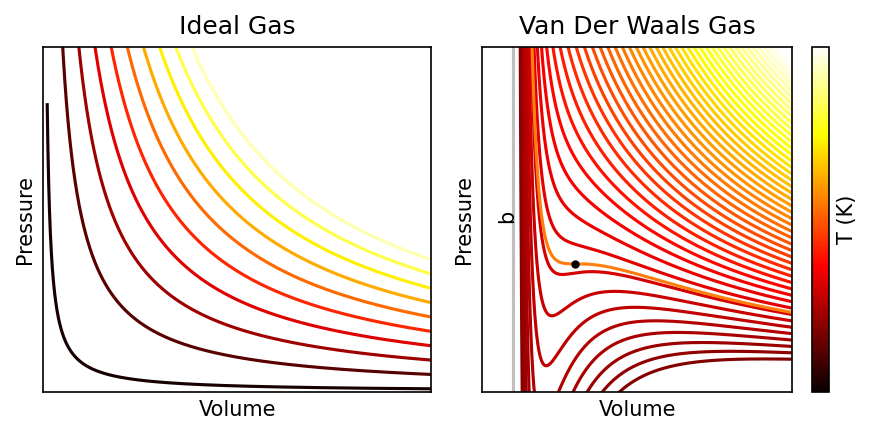

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import astropy.units as u
import astropy.constants as c
import warnings
warnings.filterwarnings('ignore')

#Defining equations of state
def ideal_gas(V,T):
    P = c.R*T/V*u.mol
    return (P)

def VDW_gas(V,T,a,b):
    P = c.R*T*u.mol/(V-b)-a/V**2
    return P

#Defining arrays
T_Ideal = np.arange(1,250,5)*u.K
V_Ideal = np.arange(0.01,1.02,0.0001)*u.m**3
T_VDW = np.arange(21,250,2)*u.K
V_VDW = np.arange(0.1,1.02,0.0001)*u.m**3
a = 1e2*u.J*u.m**3
b = 0.1*u.m**3
T_c = 8*a/(27*c.R*b*u.mol)
P_c = a/(27*b**2)
V_c = 3*b

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[6,3],dpi=150)
# Plotting Ideal Gas
for T_i in T_Ideal:
    P_ideal = ideal_gas(V_Ideal,T_i)
    ax[0].plot(V_Ideal,P_ideal,'-',c=cm.hot(T_i/len(T_Ideal)),label='')
# Plotting VDW Gas    
for T_i in T_VDW:
    P_VDW = VDW_gas(V_VDW,T_i,a=a,b=b)
    im = ax[1].plot(V_VDW,P_VDW,'-',c=cm.hot(T_i/len(T_VDW)),label='')
ax[1].plot(V_VDW, VDW_gas(V_VDW,T_c,a=a,b=b),color='C1')
ax[1].plot(V_c,P_c,'k.')
ax[1].axvline(0.1,color='grey',alpha=0.5)
ax[1].text(0.05,500,'b',rotation=90)
    
#Adding colorbar
sm = plt.cm.ScalarMappable(cmap='hot',norm=cm.colors.Normalize(vmin=min(T_VDW.value),vmax=max(T_VDW.value)))
cbar = fig.colorbar(sm, label='T (K)')
cbar.set_ticks([])

#Customising Plot
for axes in ax:
    axes.set_xlim(0.0,1)
    axes.axes.get_xaxis().set_ticks([])
    axes.set_ylim(0,1000)
    axes.axes.get_yaxis().set_ticks([])
    axes.set_ylabel("Pressure")
    axes.set_xlabel("Volume")
ax[0].set_title("Ideal Gas")
ax[1].set_title("Van Der Waals Gas")
plt.tight_layout()
plt.savefig("Figures/Isotherms.jpg")
plt.show()

The Van der Waals equation of state behaves like the Ideal gas at high temperatures (the yellow curves to the top right of the plot). However, at low temperatures, the isoterms begin to exhibit a kink. To figure out what this represents, recall that the isothermal compressability of a gas is defined as
$$
    \kappa_{T} = -\frac{1}{V}\left(\frac{\partial V}{\partial P}\right)_T
$$
For an ideal gas, this is always positive (as the last term is always negative, as the isoterms always have a negative slope). However, as we can see from the plot of the Van der Waals equation of state, at low temperatures, there are regions where $\left(\frac{\partial V}{\partial P}\right)_T$ is positive, meaning $\kappa_{T}$ becomes negative. Under such conditions, increases the pressure exerted on the gas causes the volume to increase rather than decrease. Given that this means work is done on the gas ($W=-P{\rm d} V$), then energy is provided to further increase the pressure - meaning this configuration is highly unstable!

There is a critical temperature whose isotherm does not have a positive gradient, but which has an inflection point - this is the critical temperature, and the inflection point is the critical point we encountered in the last lecture.

Let's now determine the location of this critical point for a Van der Waal's gas.

Solving the Van der Waal's equation for $P$, and assuming we're working with 1 mole, gives:
$$
    P = \frac{RT}{V-b} - \frac{a}{V^2}
$$
The inflection point occurs when
$$
    \left(\frac{\partial P}{\partial V}\right)_T = - \frac{RT}{(V-b)^2}+ \frac{2a}{V^3}=0
$$
and
$$
    \left(\frac{\partial ^2 P}{\partial V^2}\right)_T = \frac{2RT}{(V-b)^3}- \frac{6a}{V^4}=0
$$
Solving this both for $RT$ gives
$$
     \frac{2a(V-b)^2}{V^3} = RT = \frac{6a(V-b)^3}{2V^4}
$$
which gives
$$
    2 = \frac{3(V-b)}{V}
$$
and thus the critical volume is
$$
    V_{\rm C} = 3b
$$
Using this volume and the above equations then gives
$$
    T_{\rm C} = \frac{8a}{27 Rb}
$$
and
$$
    P_{\rm C} = \frac{a}{27 b^2}
$$

I'm not going to go into too detailed a discussion about what happens around this critical point. If you are interested, I highly recommend section 26.1 of Blundell & Blundell, or 5.3 of Schroeder.

## Heat Capacity of Solids

Continuing our discussion of how real systems differ from ideal gases, let's consider how heat capacities behave for solids. Imagine a solid with $N$ atoms can be modelled as a lattice, and that each atom is bonded to its neighbours by springs. This means there are 3$N$ springs in the system. As such, each atom is allowed to oscillate about its equilibrium position. Each "spring" has two quadratic modes of energy: one kinetic, and one potential, and so the equipartition of energy tells us that each spring has a mean energy
$$
    \langle E \rangle = 2 \times \frac{1}{2} k_{\rm B} T = k_{\rm B} T
$$
and that the mean energy of the system is then
$$
    \langle E \rangle = 3 N k_{\rm B} T
$$
The heat capacity of the solid is then
$$
    C = \frac{\partial \langle E \rangle}{\partial T} = 3 N k_{\rm B} = 3 R.
$$
where that last value is true for one mole of the substance. That is, the heat capacity should be constant in this picture - this is known as the Dulong-Petit law, and experiments have found that expectation value for the heat capacity is very close to what's observed in a lot of systems around room temperature. However, because of the third law of thermodynamics, we would expect the heat capacity to go to 0 at low temperatures, which this treatment does not reproduce. So how do we fix this?

## Einstein's Theory

The answer comes from Eintein's model. In this model, we again assume that all atoms are linked via a spring. However, the key insight here is that, in accordance with quantum mechanics, the springs will only be able to oscillate with discrete energies. These discrete units of vibrational energy are known as **phonons**.

Ok, let's assume we have such a lattice, and that every atom is oscillating about their equilibria positions independently of all the other atoms. The frequency of the oscillations will be given by
$$
    \nu_E = \frac{\omega_{\rm E}}{2\pi}
$$
Following the prescription of quantum mechanics, a single oscillator will have an energy of
$$
    \epsilon_r = \hbar \omega_{\rm E} \left(r+\frac{1}{2}\right)
$$
The partition function for a single oscillator in the system is
$$
    Z_1 = \sum_{n=0}^{\infty} {\rm e}^{\beta (n+1/2)\hbar \omega_{\rm E}} =\frac{{\rm e}^{-\beta \hbar \omega_{\rm E}/2}}{1-{\rm e}^{-\beta \hbar \omega_{\rm E}}}
$$
as derived in Lecture 10 (and as a part of problem set 3). The mean energy of a single oscillator is then
\begin{align}
    U_1 &= -\left(\frac{\partial\ln(Z_1)}{\partial \beta}\right)\\
        &= -\left(\frac{\partial\ln(\frac{{\rm e}^{-\beta \hbar \omega_{\rm E}/2}}{1-{\rm e}^{-\beta \hbar \omega_{\rm E}}})}{\partial \beta}\right)\\
        &= -\left(\frac{\partial\ln({\rm e}^{-\beta \hbar \omega_{\rm E}/2})}{\partial \beta}\right) -\left(\frac{\partial\ln({1-{\rm e}^{-\beta \hbar \omega_{\rm E}}})}{\partial \beta}\right)\\
        &= \frac{\hbar \omega_{\rm E}}{2}+\frac{\hbar \omega_{\rm E}{\rm e}^{-\beta \hbar \omega_{\rm E}}}{1-{\rm e}^{-\beta \hbar \omega_{\rm E}}}\\
        &= \frac{\hbar \omega_{\rm E}}{2}+\frac{\hbar \omega_{\rm E}}{{\rm e}^{\beta \hbar \omega_{\rm E}}-1}\\
\end{align}
So if we have $3 N$ phonons, then the internal energy is
$$
    U = 3 N U_1
$$
The heat capacity of this solid can then be calculated using
$$
    C_{\rm V} = \left( \frac{\partial \langle U \rangle}{\partial T} \right)_V
$$
which gives
\begin{align}
    C_{\rm V} &= 3 N \left( - \frac{(\hbar \omega_{\rm E})^2 {\rm e}^{\beta \hbar \omega_{\rm E}}} {({\rm e}^{\beta \hbar \omega_{\rm E}}-1)^2} \right) \left( \frac{-1}{k_{\rm B}T^2} \right).\\
\end{align}
If we now define the Einstein Temperature,$\Theta_{\rm E} = \frac{\hbar \omega_{\rm E}}{k_{\rm B}}$ and $x=\frac{\Theta_{\rm E}}{T}$, then this simplifies to
$$
    C_{\rm V} = 3 N k_{\rm B} \frac{ x^2 {\rm e}^{x}} {({\rm e}^{x}-1)^2}
$$
So now the question we have to ask is: does this expression for the heat capacity both satisfy the Dulong-Petit law (that is, at high temperatures, $C_{\rm V} = 3R$, and also the Third law (that is, at low temperatures, it should go to 0).

- In the high temperature limit, when $T\gg \Theta_{\rm E}$, then $x \ll 1$. If we Taylor expand $e^x$ around $x=0$, then $e^x=1+x+...$ and thus $C_{\rm V}= 3 N k_{\rm B} = 3 R$ for 1 mole, as required
- In the low temperature limit, when $T\ll \Theta_{\rm E}$, then $x \gg 1$. In this limit, $\frac{e^{x}}{(e^{x}-1)^2} \to \frac{e^{x}}{e^{2x}}=e^{-x}$. Thus, $C_{\rm V} = 3 N k_{\rm B} \left(\frac{\Theta_{\rm E}}{T}\right)^2 \exp{-\frac{\Theta_{\rm E}}{T}}$. As $T \to 0$, the exponential function goes to 0 faster than the other term grows, thus the heat capacity goes to 0 as required by the third law!

So how else is this picture useful? Let's take diamond as an example, which is the material Einstein studied in order to test this theory. By measuring the heat capacity of diamond at various temperatures, Einstein found that the Einstein temperature should be $\Theta_{\rm E} = 1325$ K. (Shown below, and data taken from Einstein's paper: https://einsteinpapers.press.princeton.edu/vol2-trans/228

Since $\Theta_{\rm E} = \frac{\hbar \omega_{\rm E}}{k_{\rm B}}$, this means we can estimate what $\omega_{\rm E}$ is. From our simplistic picture, this frequency is related to the restoring force that the atoms in the lattice are experiencing, and thus is also related to the masses of the individual atoms, the elastic properties of the solid, and the interatomic spacing. As such, a measurement of $\Theta_{\rm E}$ gives us a method of probing the internal strucutre of the material.

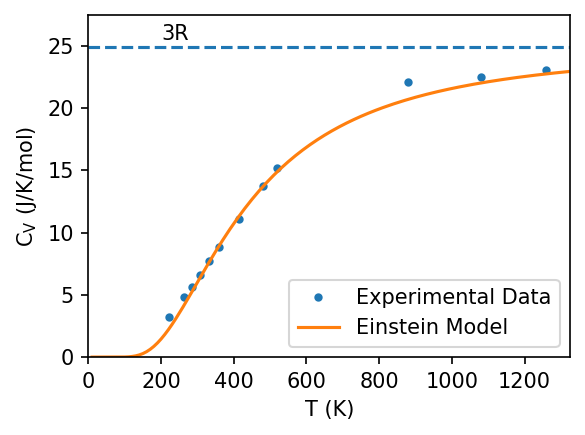

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as c

#Read in the data
data = pd.read_csv("Diamond.csv")

#The Einstein paper has all of the heat capacities in cal/kelvin/mol, so need to hard code a unit conversion
calorie = u.def_unit('calorie', 4.184 * u.J)

#Now, set up arrays and values
temp = data.Temp.values*u.K
Cv = data.Cap.values*(calorie/u.K/u.mol).to(u.J/u.K/u.mol) # Convert Cv to SI

#Finally step is to calculate the heat capacity for the Einstein model, assuming T_E = 1325*u.K
T_E = 1325*u.K
T = np.arange(10,1325,10)*u.K # Making a wide temperature array to evaluate T over
x = T_E/T
Cv_Einstein = 3*c.R*(x**2*np.exp(x)/(np.exp(x)-1)**2)

plt.figure(figsize=[4,3], dpi=150)
plt.plot(temp,Cv,'.',label='Experimental Data')
plt.plot(T,Cv_Einstein,'-',label='Einstein Model')
plt.axhline(3*c.R.value,linestyle='--')
plt.text(200,25.5, '3R')
plt.xlabel(r"T (K)")
plt.ylabel(r"C$_{\rm V}$ (J/K/mol)")
plt.ylim(0,27.5)
plt.xlim(0,1325)
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Einstein_Model_vs_Data.jpg")
plt.show()

So this picture of a solid being a lattice with phonons solves the heat capacity issue. However, experimental evidence gathered after Eintein's paper was published showed poor agreement between the measured heat capacity and the predicted heat capacity for low (<200 K) temperatures, which leads us on to Debye's model.